# e.g. 1: Compare monthly iso20 climatology from daily and monthly inputs from 1 forecast run.

# last edited 8 August 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-35-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
area_T.shape= (300, 360)
wet.shape= (300, 360)
cafe_monthly_files= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p1f1/Omon/t16d/gn/v20171025/t16d_Omon_historical_CAFE-1-0_r1i1p1f1_gn_200701-201112.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/Omon/t16d/gn/v20171025/t16d_Omon_historical_CAFE-1-0_r2i1p1f1_gn_200701-201112.nc']]
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: All years have 12 months.
xxx False
cafe_t16d_annual_climatology_from_monthly.shape= (12, 2, 300, 360)
cafe_t16d_annual_anomaly_from_monthly.shape= (60, 2, 300, 360)
area_T_match.shape= (1, 1, 300, 360)
area_T_new.shape= (60, 2, 300, 360)
plot_xy: Diagnostics turned on.
Inputing input_datas.
Inputing input_xvals.
Inputing title.
In

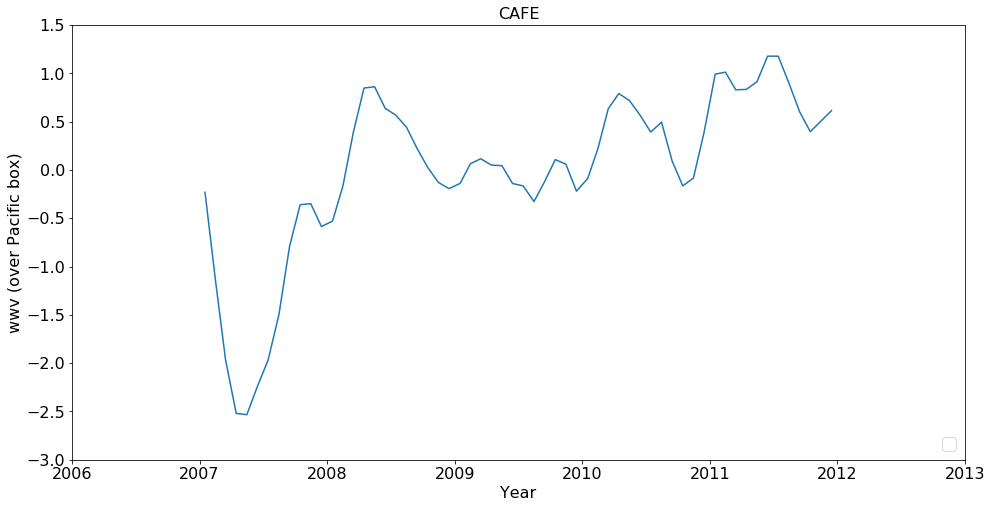

SystemExit: STOP!:jupyter_notebook line number: 114

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [46]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  #from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  import numpy.ma as ma
  import netCDF4
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple, \
    plot_xy

  from n_data_funcs import n_data_funcs
  
  model='CAFE'
  
  pval=1 #v1_forecast
  #pval=4 #v0_forecast
  
  cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
    5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}
  
#===============================================================================

  ifh=netCDF4.Dataset('/OSM/CBR/OA_DCFP/data/col414/cafepp/rundir/CMIP5/ancillary_files/grid_spec.auscom.20110618.nc')
  area_T = ifh.variables['area_T'][:]
  wet = ifh.variables['wet'][:]
  print('area_T.shape=',area_T.shape)
  print('wet.shape=',wet.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=2007
  cend=2011
  abeg=2007
  aend=2011
  
#===============================================================================

  ivar_str_cafe='t16d';offset=0.0;scale=1.0;long_name='t16d';short_name='t16d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,2+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200701-201112.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t16d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t16d_annual_climatology_from_monthly, cafe_t16d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t16d_from_monthly, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  print('cafe_t16d_annual_climatology_from_monthly.shape=',cafe_t16d_annual_climatology_from_monthly.shape)
  print('cafe_t16d_annual_anomaly_from_monthly.shape=',cafe_t16d_annual_anomaly_from_monthly.shape)
  
  area_T_match = np.expand_dims(np.expand_dims(area_T*wet,0),0)
  print('area_T_match.shape=',area_T_match.shape)
  
  area_T_new = np.tile(area_T_match,(60,2,1,1))
  print('area_T_new.shape=',area_T_new.shape)
  
  wwv3d = np.sum(np.sum(np.average(cafe_t16d_annual_anomaly_from_monthly[:,:,122:152+1,40:200+1] * area_T_new[:,:,122:152+1,40:200+1],axis=1),axis=1),axis=1)
  
  input_datas = (wwv3d/1e14,)
  input_xvals = (cafe_monthly_files.year_fraction_anomaly,)
  
  plot_xy(Diag=True, input_data=input_datas, input_xvals=input_xvals, \
    title='CAFE', \
    units='m3 * 1e14', \
    xlab='Year', \
    ylab='wwv (over Pacific box)', \
    zero2=False, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(16,8), \
    line_colors=['red'], \
    line_labels=['cafe v1'] \
    )
  
  raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  ivar_str_cafe='t20d';offset=0.0;scale=1.0;long_name='t20d';short_name='t20d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,2+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200701-201112.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t20d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t20d_annual_climatology_from_monthly, cafe_t20d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t20d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t20d_annual_climatology_from_monthly.shape=',cafe_t20d_annual_climatology_from_monthly.shape)
  print('cafe_t20d_annual_anomaly_from_monthly.shape=',cafe_t20d_annual_anomaly_from_monthly.shape)
  
#===============================================================================

  ivar_str_cafe='t22d';offset=0.0;scale=1.0;long_name='t22d';short_name='t22d';units='m';table='Omon'
  cafe_monthly_files,cafe_monthly_files_flat=[],[]
  for ensemble in range(1,2+1):
    cafe_inner_monthly_files=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_gn_200701-201112.nc'] #1 file
    for file in monthly_ifils:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files.append(idir+'/'+file)
    cafe_monthly_files.append(cafe_inner_monthly_files)
  print('cafe_monthly_files=',cafe_monthly_files)
  
  cafe_monthly_files=n_data_funcs(input_files=cafe_monthly_files,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files.calculate_filedatetime_info(Diag=False,calendar='julian')
  
  cafe_monthly_files.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_t22d_from_monthly=cafe_monthly_files.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_t22d_annual_climatology_from_monthly, cafe_t22d_annual_anomaly_from_monthly=cafe_monthly_files.monthly_clim_anom( \
    Diag=False, input=cafe_t22d_from_monthly, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  print('cafe_t22d_annual_climatology_from_monthly.shape=',cafe_t22d_annual_climatology_from_monthly.shape)
  print('cafe_t22d_annual_anomaly_from_monthly.shape=',cafe_t22d_annual_anomaly_from_monthly.shape)
  
#===============================================================================

print('END')

BEGIN
len(ytik)= 2


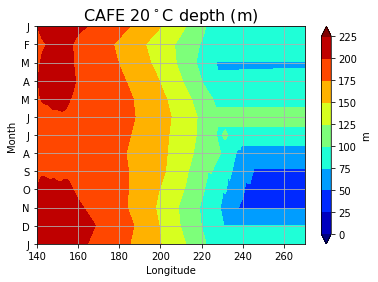

len(ytik)= 2


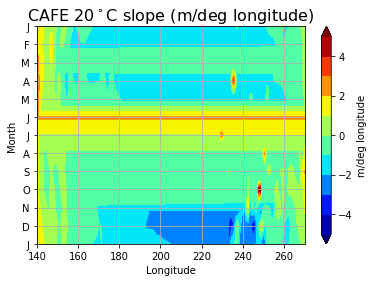

len(ytik)= 2


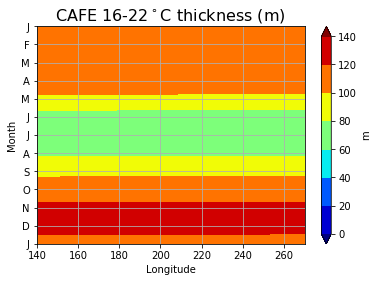

SystemExit: STOP!:jupyter_notebook line number: 63

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [24]:
print('BEGIN')

month_to_plot=10 #base 0
year_to_plot=0 #base 0
ensemble_to_plot=1 #base 0

clevs=None

#===============================================================================

hov_iso20_array=np.average(np.average(cafe_t20d_annual_climatology_from_monthly[:,:,136:137+1,:],axis=1),axis=1)
hov_iso20_array_shape=hov_iso20_array.shape
months=[]
for month in range(0,hov_iso20_array_shape[0]+1):
  months.append(month)
hov_iso20_array_shape_xtramon=[hov_iso20_array_shape[0]+1,hov_iso20_array_shape[1]]
hov_iso20_array_xtramon=ma.zeros(hov_iso20_array_shape_xtramon,dtype=float)
hov_iso20_array_xtramon[0:hov_iso20_array_shape[0],:]=hov_iso20_array
hov_iso20_array_xtramon[hov_iso20_array_shape[0],:]=hov_iso20_array[0,:]

#===============================================================================

hov_thickness_array=np.average(np.average(cafe_t16d_annual_climatology_from_monthly[:,:,136:137+1,:],axis=1),axis=1) - \
  np.average(np.average(cafe_t22d_annual_climatology_from_monthly[:,:,136:137+1,:],axis=1),axis=1)

hov_thickness_array_shape=hov_thickness_array.shape
months=[]
for month in range(0,hov_thickness_array_shape[0]+1):
  months.append(month)
hov_thickness_array_shape_xtramon=[hov_thickness_array_shape[0]+1,hov_thickness_array_shape[1]]
hov_thickness_array_xtramon=ma.zeros(hov_thickness_array_shape_xtramon,dtype=float)
hov_thickness_array_xtramon[0:hov_thickness_array_shape[0],:]=hov_thickness_array
hov_thickness_array_xtramon[hov_thickness_array_shape[0],:]=hov_thickness_array[0,:]

#===============================================================================

# j=np.gradient(cafe_t20d_annual_climatology_from_monthly[:,:,136:137+1,:],axis=3)
# print('j.shape=',j.shape)

hov_slope_array= \
  np.gradient(np.average(np.average(cafe_t20d_annual_climatology_from_monthly[:,:,136:137+1,:],axis=1),axis=1),axis=1)
hov_slope_array_shape=hov_slope_array.shape
months=[]
for month in range(0,hov_slope_array_shape[0]+1):
  months.append(month)
hov_slope_array_shape_xtramon=[hov_slope_array_shape[0]+1,hov_slope_array_shape[1]]
hov_slope_array_xtramon=ma.zeros(hov_slope_array_shape_xtramon,dtype=float)
hov_slope_array_xtramon[0:hov_slope_array_shape[0],:]=hov_slope_array
hov_slope_array_xtramon[hov_slope_array_shape[0],:]=hov_slope_array[0,:]


#===============================================================================

#print(hov_array_xtramon.shape)

shade_2d_simple(hov_iso20_array_xtramon, \
  title=model+' 20$^\circ$C depth', \
  xyvals=(cafe_monthly_files.lon[:],months), add_contours=False, \
  units='m', clevs=clevs, extend='both', cmap='jet', reverse_yaxis=True, ylab='Month', xlab='Longitude', \
  ytik=(months,['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True) # ,xtik=([140,160,180,200,220,240,260],['a',160,180,200,220,240,260]))

shade_2d_simple(hov_slope_array_xtramon, \
  title=model+' 20$^\circ$C slope', \
  xyvals=(cafe_monthly_files.lon[:],months), add_contours=False, \
  units='m/deg longitude', clevs=[-5,-4,-3,-2,-1,0,1,2,3,4,5], extend='both', cmap='jet', reverse_yaxis=True, ylab='Month', xlab='Longitude', \
  ytik=(months,['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)

shade_2d_simple(hov_thickness_array_xtramon, \
  title=model+' 16-22$^\circ$C thickness', \
  xyvals=(cafe_monthly_files.lon[:],months), add_contours=False, \
  units='m', clevs=None, extend='both', cmap='jet', reverse_yaxis=True, ylab='Month', xlab='Longitude', \
  ytik=(months,['J','F','M','A','M','J','J','A','S','O','N','D','J']), xlim=[140,270], grid=True)


#===============================================================================

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=[0,50,100,150,200,250,300]

shade_2d_curvilinear(cafe_quantity_from_monthly[month_to_plot,ensemble_to_plot,], \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' MON ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_tfreq[0][month_to_plot].day)+ \
  ' E='+str(ensemble_to_plot)+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

shade_2d_curvilinear(np.average(cafe_quantity_annual_climatology_from_monthly[year_to_plot,],axis=0), \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_climatology[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

clevs=[-80,-60,-40,-20,0,20,40,60,80]
shade_2d_curvilinear(np.average(cafe_quantity_annual_anomaly_from_monthly[year_to_plot,:],axis=0), \
  xyvals=(cafe_monthly_files.lon2d[:],cafe_monthly_files.lat2d[:]), \
  title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval]+')'+ \
  ' Y='+str(cafe_monthly_files.date_time_stamp_anomaly[0][year_to_plot].year)+ \
  ' M='+str(cafe_monthly_files.date_time_stamp_anomaly[0][year_to_plot].month)+ \
  ' D='+str(cafe_monthly_files.date_time_stamp_anomaly[0][year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
  units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

print('END')

In [36]:
cafe_monthly_files.lon[40:200]

masked_array(data=[120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5,
                   128.5, 129.5, 130.5, 131.5, 132.5, 133.5, 134.5, 135.5,
                   136.5, 137.5, 138.5, 139.5, 140.5, 141.5, 142.5, 143.5,
                   144.5, 145.5, 146.5, 147.5, 148.5, 149.5, 150.5, 151.5,
                   152.5, 153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5,
                   160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5, 167.5,
                   168.5, 169.5, 170.5, 171.5, 172.5, 173.5, 174.5, 175.5,
                   176.5, 177.5, 178.5, 179.5, 180.5, 181.5, 182.5, 183.5,
                   184.5, 185.5, 186.5, 187.5, 188.5, 189.5, 190.5, 191.5,
                   192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5,
                   200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5, 207.5,
                   208.5, 209.5, 210.5, 211.5, 212.5, 213.5, 214.5, 215.5,
                   216.5, 217.5, 218.5, 219.5, 220.5, 221.5, 222.5, 223.5,
                   224.5,